(1797, 64)
Epoch 0, Cost: 2.2517861359559324, Accuracy: 0.1246521981079577
Epoch 100, Cost: 0.3013876944510848, Accuracy: 0.9660545353366722
Epoch 200, Cost: 0.20135144073512934, Accuracy: 0.9833055091819699
Epoch 300, Cost: 0.14312578812326227, Accuracy: 0.9905397885364496
Epoch 400, Cost: 0.09350357267268454, Accuracy: 0.991652754590985
Epoch 500, Cost: 0.06395757766232968, Accuracy: 0.9927657206455203
Epoch 600, Cost: 0.060976226149115936, Accuracy: 0.9927657206455203
Epoch 700, Cost: 0.034455274277584866, Accuracy: 0.9938786867000556
Epoch 800, Cost: 0.05327395624882836, Accuracy: 0.9938786867000556
Epoch 900, Cost: 0.025692919942151907, Accuracy: 0.9955481357818586


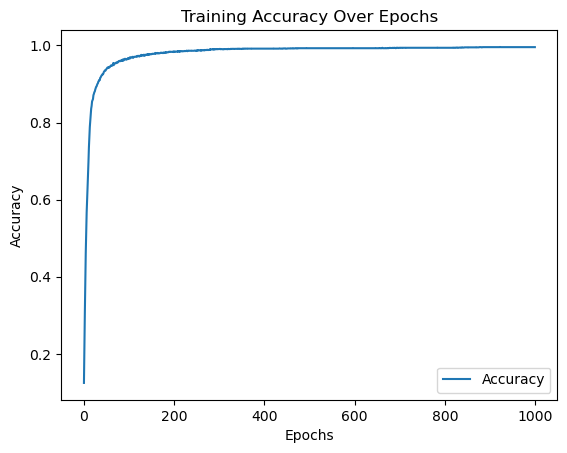

In [87]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

#print(digits.data.shape)
#plt.gray()
#plt.matshow(digits.images[0])
#plt.show()

# Load digits dataset
digits = load_digits()
data, target = digits.data, digits.target

# norming data between 0 and 1
input_norm = (data-np.min(data))/(np.max(data)-np.min(data))
print (input_norm.shape)

# one hot target
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]

X = digits.data
Y = one_hot_encode(digits.target, num_classes=10)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cce_loss(y_true, y_pred):
    return -np.sum(np.dot(y_true , np.log(y_pred)))

def cce_back(y_true, y_pred):
    return -y_true/y_pred

def sigmoid_back(x):
    return sigmoid(x)*(1- sigmoid(x))

def shuffle_data(X, Y):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], Y[indices]

def generator(X, Y, batch_size):
    m = X.shape[0]
    num_batches = m // batch_size
    for i in range(num_batches):
        start = i * batch_size
        end = (i + 1) * batch_size
        yield X[start:end], Y[start:end]

def initialize_parameters(badgesize, layersize):
    parameters = []
    for i in range(layersize - 1):
        W = np.random.randn(badgesize[i], badgesize[i+1]) / np.sqrt(badgesize[i])
        b = np.zeros((1, badgesize[i+1]))
        parameters.append({'W': W, 'b': b})
    return parameters

def forward_propagation(X, parameters, activations):
    for i in range(len(parameters)):
        Z = np.dot(X, parameters[i]['W']) + parameters[i]['b']
        if i == len(parameters) - 1:
            A = softmax(Z)
        else:
            A = sigmoid(Z)
        activations[i].update({'Z': Z})
        activations[i].update({'A': A})
        X = A
    return A

def backward_propagation(X, Y, parameters, activations, gradients):
    m = X.shape[0]
    dZ = activations[1]['A'] - Y
    for i in range(len(parameters)-1, -1, -1):
        gradients[i]['dW'] = np.dot(activations[i-1]['A'].T, dZ) / m if i > 0 else np.dot(X.T, dZ) / m
        gradients[i]['db'] = np.sum(dZ, axis=0, keepdims=True) / m
        dZ = np.dot(dZ, parameters[i]['W'].T) * (activations[i-1]['A'] * (1 - activations[i-1]['A'])) if i > 0 else 0

def update_parameters(parameters, gradients, learning_rate):
    for i in range(len(parameters)):
        parameters[i]['W'] -= learning_rate * gradients[i]['dW']
        parameters[i]['b'] -= learning_rate * gradients[i]['db']






# Adjustable parameters
badgesize = [64, 32, 10]  # Number of neurons in each layer
layersize = len(badgesize)  # Number of layers

# Hyperparameters
learning_rate = 0.01
epochs = 1000
batch_size = 64

# Initialize parameters
parameters = initialize_parameters(badgesize, layersize)

# Lists to store accuracy and costs for plotting
accuracy_history = []
cost_history = []

# Training loop
for epoch in range(epochs):
    X, Y = shuffle_data(X, Y)
    correct_predictions = 0
    for batch_X, batch_Y in generator(X, Y, batch_size):
        activations = [{} for _ in range(layersize)]
        gradients = [{} for _ in range(layersize)]
        
        # Forward pass
        output = forward_propagation(batch_X, parameters, activations)
        
        # Backward pass
        backward_propagation(batch_X, batch_Y, parameters, activations, gradients)
        
        # Update parameters
        update_parameters(parameters, gradients, learning_rate)

        # Count correct predictions for accuracy calculation
        correct_predictions += np.sum(np.argmax(output, axis=1) == np.argmax(batch_Y, axis=1))
       
 # Calculate accuracy and cost after each epoch
    accuracy = correct_predictions / X.shape[0]
    cost = -np.mean(np.sum(batch_Y * np.log(output), axis=1))
    
    accuracy_history.append(accuracy)
    cost_history.append(cost)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Cost: {cost}, Accuracy: {accuracy}")

# Plotting accuracy
plt.plot(range(epochs), accuracy_history, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()